In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.pipeline import Pipeline


# sec 1

In [2]:
# !pip install mlxtend # Uncomment this line to install mlxtend package

In [3]:
red_wine = pd.read_csv("data/winequality-red.csv", sep=';', delimiter=None, header='infer', names=None, index_col=None, 
                          usecols=None)


In [4]:
display(red_wine.head())
print("Valeurs manquantes :", red_wine.isna().sum().sum(), "- La dimension de la data est:", red_wine.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Valeurs manquantes : 0 - La dimension de la data est: (1599, 12)


In [5]:
# on constacte qu'on a pas de variable de type caractère dans la base 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(red_wine.select_dtypes(include=numerics).columns)
print('nombre de variable numéric dans la table : ', len(numerical_vars))
print('-'*100)
data = red_wine[numerical_vars]
print('Numerical Variables Column: ',numerical_vars)

nombre de variable numéric dans la table :  12
----------------------------------------------------------------------------------------------------
Numerical Variables Column:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
red_wine.index

RangeIndex(start=0, stop=1599, step=1)

In [7]:
# pas de valeur manquante 
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
red_wine.duplicated().sum()

240

In [9]:
#Removing all the duplicated records
red_wine.drop_duplicates(inplace=True)

In [10]:
# valeurs abérantes 

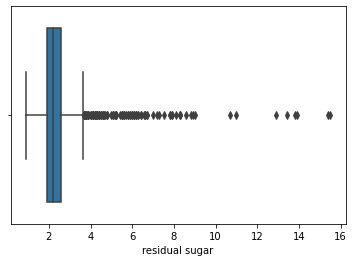

In [11]:
sns.boxplot(x=red_wine['residual sugar'])
plt.show;

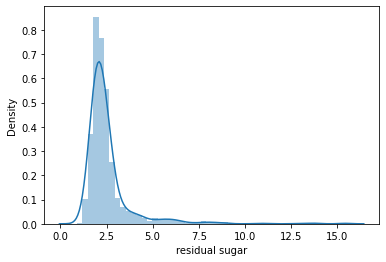

In [12]:
sns.distplot(red_wine['residual sugar']);

In [13]:
def table_sans_val_ab(df): 
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_vars = list(df.select_dtypes(include=numerics).columns)
    ff= df.columns
    for i in  numerical_vars :
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_lim = Q1 - 1.5*IQR
        upper_lim = Q3 - 1.5*IQR
        
        outlier_low = (df[i] < lower_lim)
        outlier_up =(df[i]> upper_lim)
        sans_val= df[(outlier_low |outlier_up )]
        
    return  sans_val

In [14]:
table_sans_val_ab(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
round(red_wine.describe(exclude = 'object'), 2).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.31,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1359.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1359.0,0.27,0.20,0.00,0.09,0.26,0.43,1.00
residual sugar,1359.0,2.52,1.35,0.90,1.90,2.20,2.60,15.50
chlorides,1359.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1359.0,15.89,10.45,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1359.0,46.83,33.41,6.00,22.00,38.00,63.00,289.00
density,1359.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1359.0,3.31,0.16,2.74,3.21,3.31,3.40,4.01
sulphates,1359.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


In [16]:
# selection de variable 

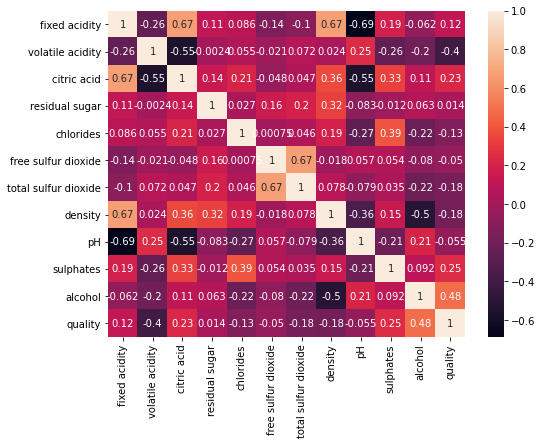

In [17]:
# la matrice de corrélation permet de
corr_df = red_wine.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [18]:
# Recuperer les varaibles ayant une certaine corélation ici 0.7 pour les supprimés mais il y'a pas des variables 
# 
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(red_wine, 0.7)
len(set(corr_features))

0

In [20]:
#Feature Engineering...
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
red_wine['quality'] = pd.cut(red_wine['quality'], bins = bins, labels = group_names)

#Feature Transformation...
red_wine['quality'].replace({'bad':0, 'good':1}, inplace=True)

In [21]:
red_wine['quality']

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int64

In [22]:
print("Dimensions de l'espace de départ : {}".format(red_wine.shape[1]))

Dimensions de l'espace de départ : 12


In [23]:
# # center les données 
# mise_a_echelle = StandardScaler()
# red_wine2= mise_a_echelle.fit_transform(red_wine)

In [24]:
# train, test = train_test_split(red_wine, test_size=0.3, stratify = red_wine['quality'], random_state=42)
# print(train.shape)
# print(test.shape)

In [25]:
# train['quality'].value_counts(normalize=True)
# test['quality'].value_counts(normalize=True)
# red_wine['quality'].value_counts(normalize=True)

In [26]:
# X_train = train.drop(['quality'],axis = 1 ) 
# X_test = test.drop(['quality'],axis = 1 ) 

In [27]:
# y_train = train['quality'].values
# y_test = test['quality'].values

In [28]:
# def run_randomForests(X_train, X_test, y_train, y_test):
#     rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
#     rf.fit(X_train, y_train)
#     print('Train set')
#     pred = rf.predict_proba(X_train)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
#     print('Test set')
#     pred = rf.predict_proba(X_test)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [29]:
# run_randomForests(X_train,
#                   X_test,
#                   y_train, y_test)

In [30]:
# sfs1 = sfs(RandomForestClassifier(n_jobs=4), 
#            k_features=10, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='roc_auc',
#            cv=3)

# sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

In [31]:
# selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
# selected_feat

In [32]:
# def run_randomForests(X_train, X_test, y_train, y_test):
#     rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
#     rf.fit(X_train, y_train)
#     print('Train set')
#     pred = rf.predict_proba(X_train)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
#     print('Test set')
#     pred = rf.predict_proba(X_test)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [33]:
# run_randomForests(X_train[selected_feat],
#                   X_test[selected_feat],
#                   y_train, y_test)

In [34]:
# y_train.shape

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(
#     data.drop(labels=['TARGET'], axis=1),
#     data['TARGET'],
#     test_size=0.3,
#     random_state=0)

In [36]:
# # removed correlated  features
# X_train.drop(labels=corr_features, axis=1, inplace=True)
# X_test.drop(labels=corr_features, axis=1, inplace=True)

# X_train.shape, X_test.shape

In [37]:
# sfs1 = SFS(RandomForestClassifier(n_jobs=4), 
#            k_features=10, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='roc_auc',
#            cv=3)

# sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

In [38]:
# def run_randomForests(X_train, X_test, y_train, y_test):
#     rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
#     rf.fit(X_train, y_train)
#     print('Train set')
#     pred = rf.predict_proba(X_train)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
#     print('Test set')
#     pred = rf.predict_proba(X_test)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [39]:
# # evaluate performance of algorithm built
# # using selected features

# run_randomForests(X_train[selected_feat].fillna(0),
#                   X_test[selected_feat].fillna(0),
#                   y_train, y_test)

Step forward feature selection
Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

The pre-set criteria can be the roc_auc for classification and the r squared for regression for example.

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features.

Here I will use the Step Forward feature selection algorithm from mlxtend in a classification (Paribas) and regression (House Price) dataset.

In [40]:
# def run_randomForests(X_train, X_test, y_train, y_test):
#     rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
#     rf.fit(X_train, y_train)
#     print('Train set')
#     pred = rf.predict_proba(X_train)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
#     print('Test set')
#     pred = rf.predict_proba(X_test)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [41]:
# run_randomForests(X_train[selected_feat].fillna(0),
#                   X_test[selected_feat].fillna(0),
#                   y_train, y_test)

In [42]:
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [43]:
# k_features = [len(k) for k in sfs.subsets_]
# plt.plot(k_features, sfs.scores_, marker='o')
# plt.ylim([0.7, 1.02])
# plt.ylabel('Accuracy')
# plt.xlabel('Number of features')
# plt.grid()
# plt.tight_layout()
# plt.show()

# Lasso for features selection

In [44]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [45]:
X, y = red_wine.drop('quality', axis=1), red_wine.quality

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

In [47]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

In [48]:
param = {
    'model__alpha':[.00001, .0001, .001, .01],
    'model__fit_intercept':[True,False],
    'model__normalize':[True,False],
    'model__positive':[True,False],
    'model__selection':['cyclic','random'],
    }

In [49]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'model__alpha', 'model__copy_X', 'model__fit_intercept', 'model__max_iter', 'model__normalize', 'model__positive', 'model__precompute', 'model__random_state', 'model__selection', 'model__tol', 'model__warm_start'])

In [50]:
search = GridSearchCV(estimator=pipeline, param_grid=param, cv=10, scoring='neg_mean_squared_error', verbose=1)

In [51]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'model__fit_intercept': [True, False],
                         'model__normalize': [True, False],
                         'model__positive': [True, False],
                         'model__selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [52]:
search.best_params_

{'model__alpha': 0.001,
 'model__fit_intercept': True,
 'model__normalize': False,
 'model__positive': False,
 'model__selection': 'cyclic'}

In [53]:
coef_0 = search.best_estimator_[1].coef_

In [54]:
search.best_estimator_[1].coef_

array([ 0.05970173, -0.03928538,  0.01087071,  0.01616288, -0.03552194,
       -0.        , -0.02008568, -0.05350319, -0.        ,  0.06153732,
        0.07431952])

features selected by model

In [55]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [56]:

feat = np.array(X.columns)[coef_0 != 0]
feat

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'], dtype=object)

In [57]:
not_feat = np.array(X.columns)[coef_0 == 0]
not_feat

array(['free sulfur dioxide', 'pH'], dtype=object)

In [58]:
red_wine[feat].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,40.0,0.9978,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,59.0,0.9964,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,21.0,0.9946,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,18.0,0.9968,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,102.0,0.9978,0.80,10.5
10,6.7,0.58,0.08,1.8,0.097,65.0,0.9959,0.54,9.2
